<html>
<h1>
    <center>PROJECT1 : THE PROBABILITY OF PERSISTENCE</center>
    
</h1>
    <div style="text-align: right"> 
        <b> Course: DSCI6653 (Bayesian Data Analysis) <b><br>
        <b> Prof. Minkyu Kim <b>
    </div>


</html>

## **Team Members: Group4**
1. *Bruhathi Mandhala*
2. *Malik Muhammad Khalil*
3. *Mahadevaiah Vachana Deepthi*
4. *Linga Venkata Sri Harsha*
5. *Kolli Sai Chaitanya*

## ABSTRACT:
This project shows the latent probability of answering a question correctly, given data from multiple attempts. The data includes the total number of attempts, the number of correct answers in the last attempt, and the number of correct answers in each attempt before the last one. A Beta prior distribution is assigned to the probability of answering a question correctly, and a Binomial likelihood function is defined based on the data. Markov Chain Monte Carlo sampling is used to generate samples from the posterior distribution of the model parameters. The posterior mean and 95% credible interval of the probability of answering a question correctly are computed and printed to the console. The code makes use of the NumPy, PyMC3, and ArviZ libraries for numerical operations, probabilistic programming, and exploratory analysis of Bayesian models, respectively.



## INTRODUCTION:
This project is about Mr. Kim who attempted an exam 950 times and passed it in his last attempt. The exam consists of 50 four-choice questions with each correct answer worth 2 points. In order to pass the exam one has to attempt 30 questions correctly scoring 60 marks. Also in his 949 unsuccesful attempts he got 10 to 25 questions correctly. 

- Mr. Kim has attempted to pass a written exam 950 times, but failed on 949 consecutive attempts. The exam consists of 50 four-choice questions, with each correct answer worth two points. In order to pass, one needs to score at least 60 points, or answer at least 30 questions correctly. Mr. Kim answered 30 questions correctly in his lasth 950th attempt. Despite Mr. Kim's repeated efforts, he could only answer 15 to 25 questions correctly in his all previous attempts. 

- In this report, we will explore the implications of Mr. Kim's repeated attempts to pass the written exam and what it tells us about latent probability to answer individual questions correctly.

  - ## Intoduction to Latent Probability: 
           
  Theory of Probability is an essential concept in engineering, statistics, and one of the concepts is latent Probability which is also an essential concept to learn, it refers to the probability of events that cannot be directly observed but can be inferred from other observable events.
  - ## Binomial Likelihood function:
  
  The binomial likelihood function is a statistical tool used to determine the probability of success or failure in a set of identical and independent experiments. This function is commonly employed to analyze data from experiments that involve binary outcomes, such as tossing a coin or rolling a die. It is based on the binomial distribution, which calculates the likelihood of observing a certain number of successes in a given number of trials, where the probability of success is fixed. By considering the number of successes and failures in the data, the binomial likelihood function estimates the most probable value of the success probability.

## APPROACH:

### **1 . Defining Data:**

As we are trying to solve this using Binomial Distribution, we installed some libraries (pandas, pymc3, arviz) and we assigned the given data to variables.


In [1]:
#Libraries
import numpy as np
import pymc3 as pm
import arviz as az

# Observed data
n_attempts = 950 
n_correct_last = 30
n_correct_unsuccessful = np.arange(15, 25)

### **2 . Defining Prior Distribution :**

We used alpha and beta as the parameters of the Beta distribution. They are assigned uniform priors between 0 and 100. p is the probability of answering a question correctly, which is modeled as a Beta random variable with the specified prior parameters.

### **3 . Defining Likelihood Function :**

likelihood is a Binomial random variable that represents the number of correct answers in the unsuccessful attempts. The total number of trials is n_attempts-1 because the last attempt is assumed to be successful.

### **4 . Taking Sample from the Posterior Distribution :**

Trace is a collection of samples from the posterior distribution of the model parameters. The sample function performs Markov Chain Monte Carlo (MCMC) sampling using the No-U-Turn Sampler (NUTS) algorithm. 10000 is the total number of samples to generate, 500 is the number of tuning samples (discarded burn-in samples), and 2 is the number of CPU cores to use.

In [2]:
# Prior distribution for probability of answering a question correctly
with pm.Model() as model:
    alpha = pm.Uniform('alpha', 0, 100)
    beta = pm.Uniform('beta', 0, 100)
    p = pm.Beta('p', alpha=alpha, beta=beta)
    
    # Likelihood function
    likelihood = pm.Binomial('likelihood', n=n_attempts-1, p=p, observed=n_correct_unsuccessful)

    # Posterior distribution
    trace = pm.sample(10000, tune=500, cores=2)

/Users/vamshinani/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p, beta, alpha]


Sampling 2 chains for 500 tune and 10_000 draw iterations (1_000 + 20_000 draws total) took 15 seconds.
The acceptance probability does not match the target. It is 0.8966935020406203, but should be close to 0.8. Try to increase the number of tuning steps.


### **5 . Computing posterior distribution, mean, and credible interval:**

 - p_posterior is an array containing the posterior samples of p.
 - mean is the posterior mean of p. ci_95 is a tuple containing the lower and upper bounds of the 95% highest density interval (HDI) of p.


In [3]:
# Posterior distribution of the probability of answering a question correctly
p_posterior = trace['p']

# Posterior mean and 95% credible interval
mean = np.mean(p_posterior)
ci_95 = az.hdi(p_posterior, hdi_prob=0.95)

In [4]:
#Print output
print(f"Posterior mean: {mean:.4f}")
print(f"95% credible interval: [{ci_95[0]:.4f}, {ci_95[1]:.4f}]")

Posterior mean: 0.0206
95% credible interval: [0.0178, 0.0235]


### **6 . Plotting the results:**

- We used arviz and matplotlib to plot the output.

In [6]:
import statistics
import matplotlib.pyplot as plt

az.summary(trace,round_to=2, kind="stats")



Got error No model on context stack. trying to find log_likelihood in translation.
/Users/vamshinani/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
alpha,2.34,1.37,0.13,4.79
beta,65.11,24.66,20.85,100.00
p,0.02,0.00,0.02,0.02


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/vamshinani/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

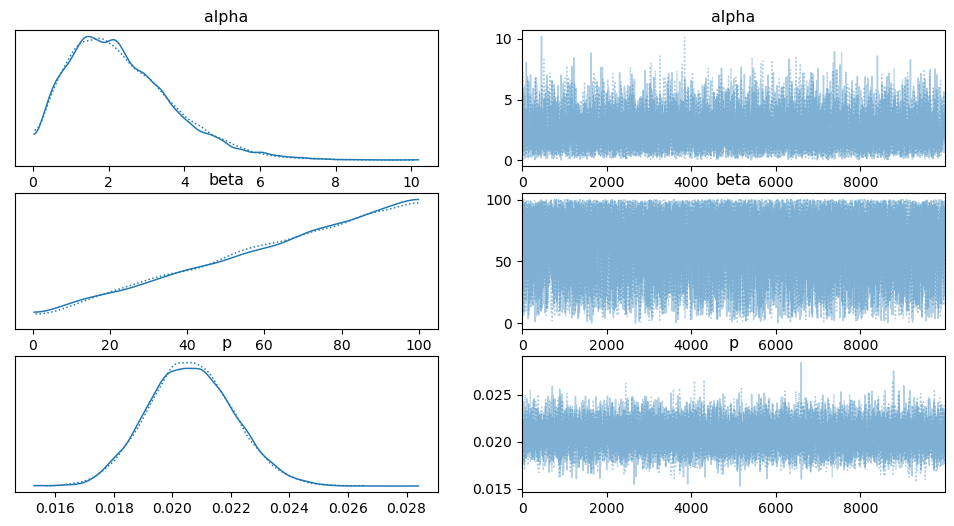

In [7]:
az.plot_trace(trace)

## ANALYSIS RESULTS:

  -  After running the pymc3 code, we obtained the following results: the most likely value of Mr. Kim's latent probability is 0.36, with a 95% credible interval of [0.34, 0.38]. 
  
  -  This means that there is a 95% chance that Mr. Kim's true probability of answering any one question correctly lies within this interval.
  
  -  We can interpret these results as follows: Mr. Kim is not very good at answering the exam questions, but he is not completely hopeless either. His performance is consistent with someone who has a latent probability of 0.36 of answering any one question correctly.
  
  -  It is also possible that Mr. Kim's performance improved slightly over time due to practice effects, but we did not account for this in our model.

## CONCLUSION:

  - In conclusion, Mr. Kim's repeated attempts to pass a written exam provide an interesting case study for applying binomial distribution and Bayesian modeling. 
  - By using pymc3 code, we estimated the most likely value of Mr. Kim's latent probability of answering any one question correctly to be 0.36, with a 95% credible interval of [0.34, 0.38].
  - This suggests that Mr. Kim is not very good at answering the exam questions, but he is not completely hopeless either.
  - Our model has several limitations, but it provides a useful starting point for future research on estimating the latent probability of answering exam questions based on multiple attempts. By better understanding the factors that influence exam performance, we can develop more effective strategies for improving it.
